In [19]:
import numpy as np
import pandas as pd
import os
import nltk
from nltk.chunk import ne_chunk
import glob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import word_tokenize, pos_tag, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Timo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Timo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Timo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Timo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
path = "data"
file_contents = []
file_paths = glob.glob(path + '/*.txt')
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        file_contents.append(content)

State of the Union addresses for Washington:


Fellow-Citizens of the Senate and House of Representatives:

I embrace with great satisfaction the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs. The recent accession of the important state of North Carolina to the Constitution of the United States (of which official information has been received), the rising credit and respectability of our country, the general and increasing good will toward the government of the Union, and the concord, peace, and plenty with which we are blessed are circumstances auspicious in an eminent degree to our national prosperity.

In resuming your consultations for the general good you can not but derive encouragement from the reflection that the measures of the last session have been as satisfactory to your constituents as the novelty and difficulty of the work allowed you to hope. Still further to realize their expectations and to secure t

In [3]:
first = file_contents[0]
sentences = sent_tokenize(first)
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# ner_categories = defaultdict(int)
# print(ner_categories)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label"):
            print(chunk) 

(NE Senate/NNP)
(NE House/NNP)
(NE North/NNP Carolina/NNP)
(NE United/NNP States/NNPS)
(NE Union/NNP)
(NE Indians/NNPS)
(NE Virginia/NNP)
(NE Union/NNP)
(NE United/NNP States/NNPS)
(NE Uniformity/NN)
(NE United/NNP States/NNPS)
(NE Knowledge/NNP)
(NE House/NNP)
(NE United/NNP States/NNPS)
(NE Senate/NNP)
(NE House/NNP)


In [4]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

(ORGANIZATION Senate/NNP)
(ORGANIZATION House/NNP)
(GPE North/NNP Carolina/NNP)
(GPE United/NNP States/NNPS)
(ORGANIZATION Union/NNP)
(GPE Indians/NNPS)
(ORGANIZATION Commonwealth/NNP)
(GPE Virginia/NNP)
(ORGANIZATION Union/NNP)
(GPE United/NNP States/NNPS)
(GPE Various/JJ)
(GPE Uniformity/NN)
(GPE United/NNP States/NNPS)
(GPE Knowledge/NNP)
(ORGANIZATION House/NNP)
(GPE United/NNP States/NNPS)
(ORGANIZATION Senate/NNP)
(ORGANIZATION House/NNP)
(ORGANIZATION Union/NNP)


([<matplotlib.patches.Wedge at 0x1c440502d40>,
 [Text(-0.7742367471554675, -0.7813817628753059, 'ORGANIZATION'),
  Text(0.7742366739972242, 0.781381835364578, 'GPE')],
 [Text(-0.4223109529938913, -0.4262082342956214, '47.4%'),
  Text(0.42231091308939495, 0.4262082738352243, '52.6%')])

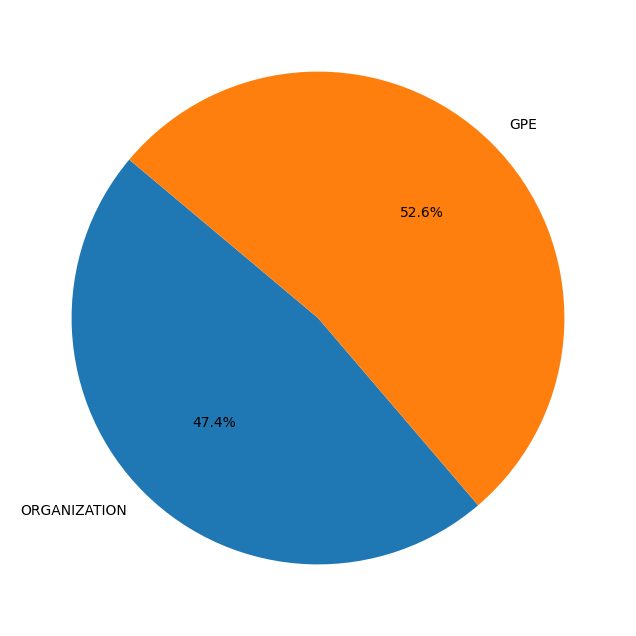

In [5]:
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            print(chunk)
            
# Create a list from the dictionary keys for the cart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
fig = plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

In [6]:
for content in file_contents:
    # Tokenize the text into sentences
    sentences = sent_tokenize(content)
    
    # Tokenize each sentence into words
    token_sentences = [word_tokenize(sent) for sent in sentences]
    
    # Tag each tokenized sentence into parts of speech
    pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
    
    # Create the named entity chunks
    chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
    
    # Test for stems of the tree with 'NE' tags
    for sent in chunked_sentences:
        for chunk in sent:
            if hasattr(chunk, "label"):
                print(chunk)

(NE Senate/NNP)
(NE House/NNP)
(NE North/NNP Carolina/NNP)
(NE United/NNP States/NNPS)
(NE Union/NNP)
(NE Indians/NNPS)
(NE Virginia/NNP)
(NE Union/NNP)
(NE United/NNP States/NNPS)
(NE Uniformity/NN)
(NE United/NNP States/NNPS)
(NE Knowledge/NNP)
(NE House/NNP)
(NE United/NNP States/NNPS)
(NE Senate/NNP)
(NE House/NNP)
(NE Senate/NNP)
(NE House/NNP)
(NE American/JJ)
(NE Holland/NNP)
(NE Europe/NNP)
(NE Treasury/NNP)
(NE Kentucky/NNP)
(NE Virginia/NNP)
(NE Union/NNP)
(NE Congress/NNP)
(NE APP/NNP Note/NNP)
(NE Union/NNP)
(NE Kentucky/NNP)
(NE Congress/NNP)
(NE APP/NNP Note/NNP)
(NE Ohio/NNP)
(NE Wabash/NNP)
(NE United/NNP States/NNPS)
(NE Western/JJ)
(NE Union/NNP)
(NE Europe/NNP)
(NE United/NNP States/NNPS)
(NE Mediterranean/NNP)
(NE States/NNPS)
(NE Christian/JJ Majesty/NNP)
(NE House/NNP)
(NE Western/JJ)
(NE Senate/NNP)
(NE House/NNP)
(NE Senate/NNP)
(NE House/NNP)
(NE United/NNP States/NNPS)
(NE Bank/NNP)
(NE United/NNP States/NNPS)
(NE Indians/NNPS)
(NE United/NNP States/NNPS)
(NE 

In [13]:
files = os.listdir(path)
by_president={}
for file in files:
    filename = os.path.splitext(file)[0]
    year, president = filename.split('_')
    with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
        address = f.read()
    if president in by_president:
        by_president[president].append(address)
    else:
        by_president[president] = [address]

In [16]:
president_name = 'Washington'
if president_name in by_president:
    addresses = by_president[president_name]
    print(f"State of the Union addresses for {president_name}:")
    for address in addresses:
        print(address)

State of the Union addresses for Washington:


Fellow-Citizens of the Senate and House of Representatives:

I embrace with great satisfaction the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs. The recent accession of the important state of North Carolina to the Constitution of the United States (of which official information has been received), the rising credit and respectability of our country, the general and increasing good will toward the government of the Union, and the concord, peace, and plenty with which we are blessed are circumstances auspicious in an eminent degree to our national prosperity.

In resuming your consultations for the general good you can not but derive encouragement from the reflection that the measures of the last session have been as satisfactory to your constituents as the novelty and difficulty of the work allowed you to hope. Still further to realize their expectations and to secure t

State of the Union addresses for Washington:
(ORGANIZATION Senate/NNP)
(ORGANIZATION House/NNP)
(GPE North/NNP Carolina/NNP)
(GPE United/NNP States/NNPS)
(ORGANIZATION Union/NNP)
(GPE Indians/NNPS)
(ORGANIZATION Commonwealth/NNP)
(GPE Virginia/NNP)
(ORGANIZATION Union/NNP)
(GPE United/NNP States/NNPS)
(GPE Various/JJ)
(GPE Uniformity/NN)
(GPE United/NNP States/NNPS)
(GPE Knowledge/NNP)
(ORGANIZATION House/NNP)
(GPE United/NNP States/NNPS)
(ORGANIZATION Senate/NNP)
(ORGANIZATION House/NNP)
(ORGANIZATION Union/NNP)
(ORGANIZATION Senate/NNP)
(ORGANIZATION House/NNP)
(GPE American/JJ)
(GPE Holland/NNP)
(GPE Europe/NNP)
(ORGANIZATION Treasury/NNP)
(GPE Kentucky/NNP)
(GPE Virginia/NNP)
(ORGANIZATION Union/NNP)
(ORGANIZATION Congress/NNP)
(ORGANIZATION APP/NNP Note/NNP)
(ORGANIZATION Union/NNP)
(GPE Kentucky/NNP)
(ORGANIZATION Congress/NNP)
(ORGANIZATION APP/NNP Note/NNP)
(GPE Indians/NNPS)
(ORGANIZATION Ohio/NNP)
(GPE Wabash/NNP)
(GPE United/NNP States/NNPS)
(LOCATION Western/JJ)
(ORGANIZATI

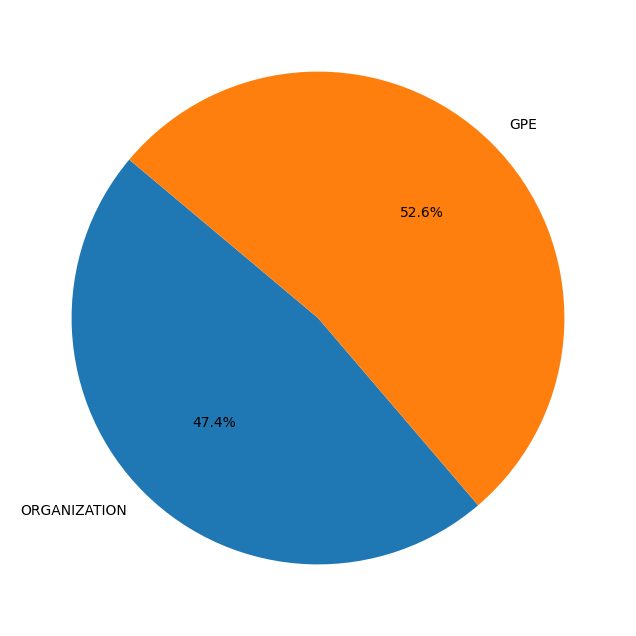

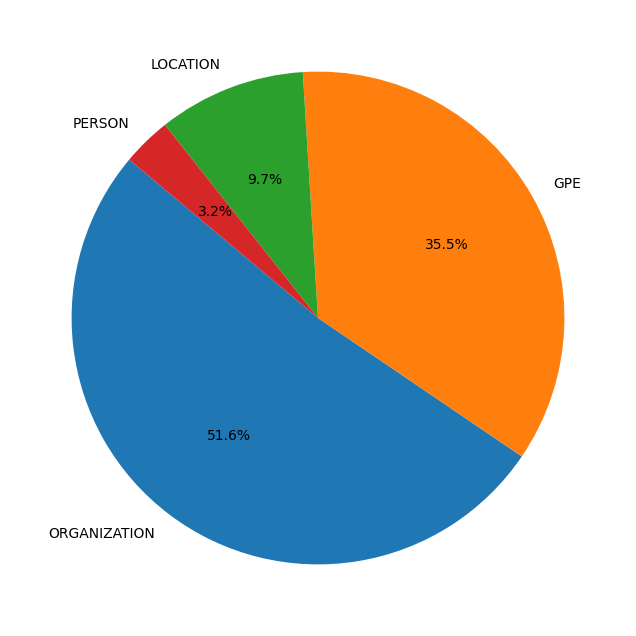

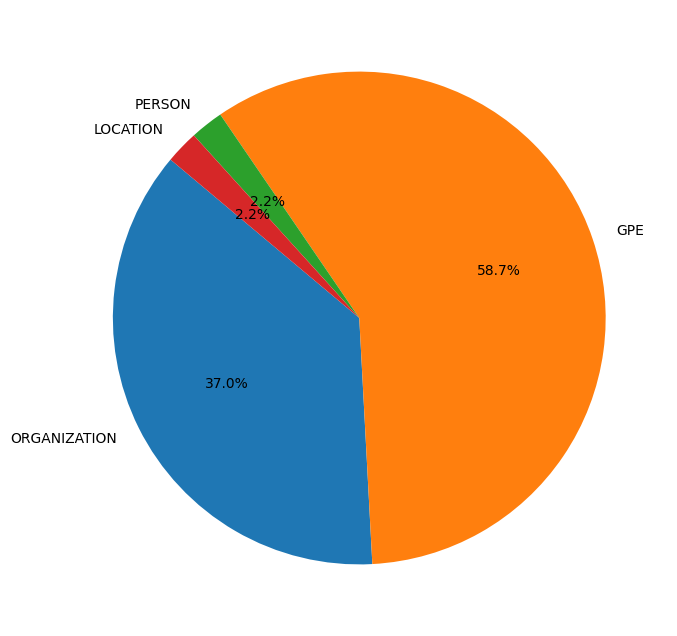

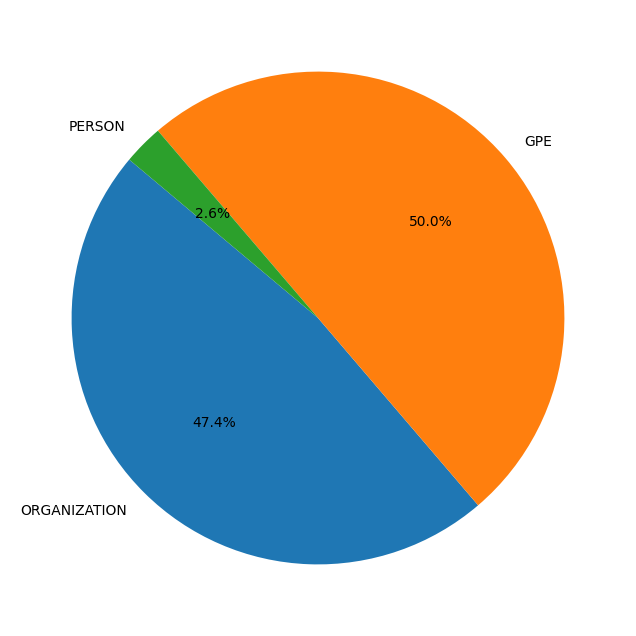

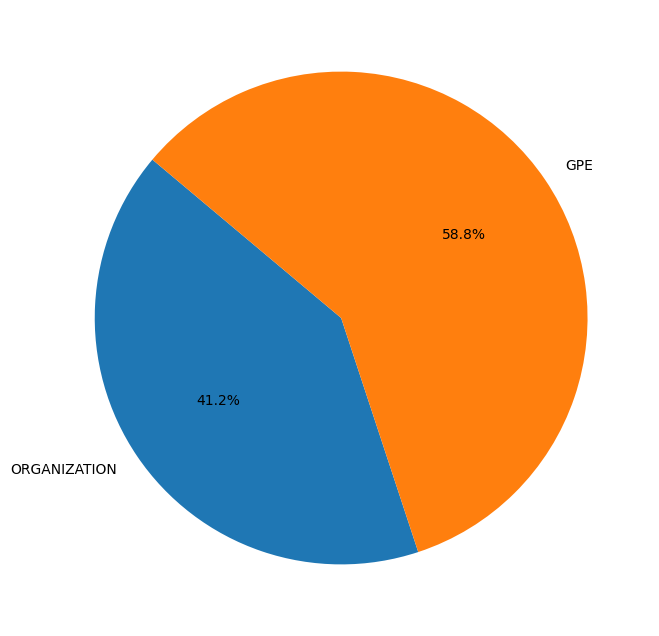

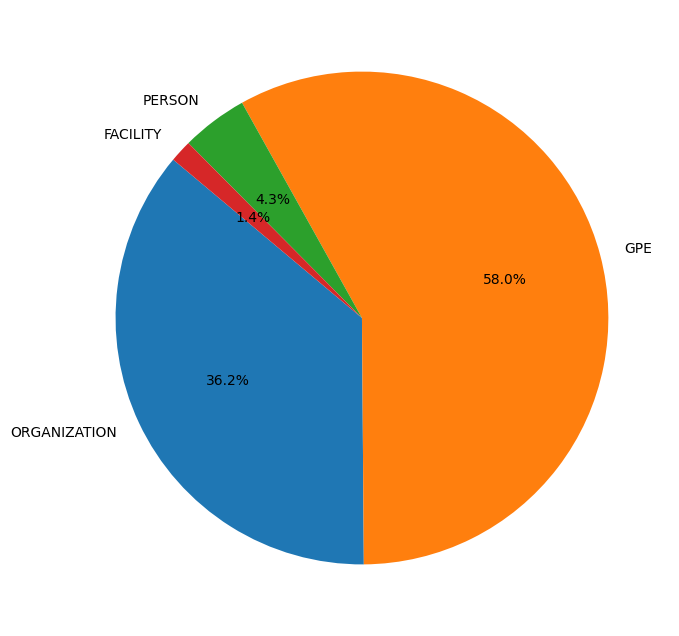

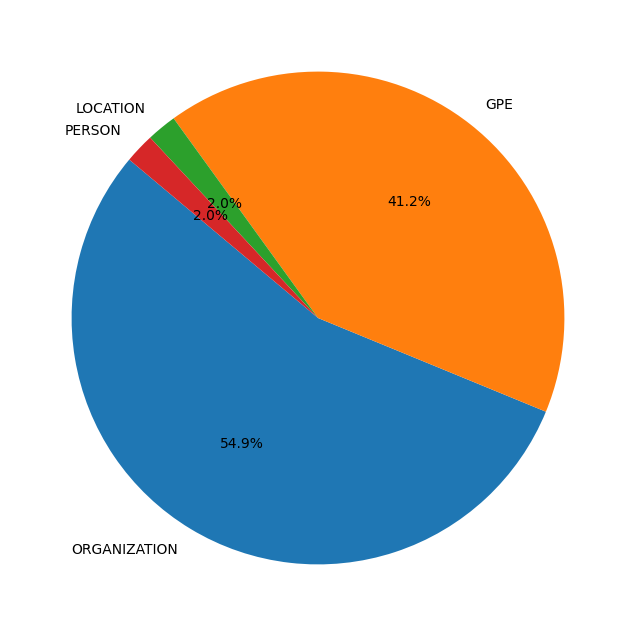

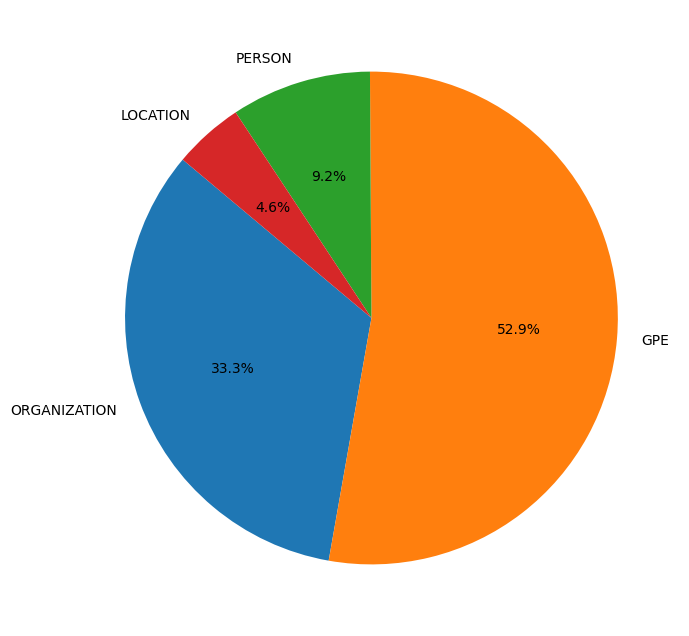

In [17]:
president_name = 'Washington'
if president_name in by_president:
    addresses = by_president[president_name]
    print(f"State of the Union addresses for {president_name}:")
    for address in addresses:
        sentences = sent_tokenize(address)
        token_sentences = [word_tokenize(sent) for sent in sentences]

        # Tag each tokenized sentence into parts of speech: pos_sentences
        pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

        # Create the named entity chunks: chunked_sentences  
        chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)
        ner_categories = defaultdict(int)

        # Create the nested for loop
        for sent in chunked_sentences:
            for chunk in sent:
                if hasattr(chunk, 'label'):
                    ner_categories[chunk.label()] += 1
                    print(chunk)
            
# Create a list from the dictionary keys for the cart labels: labels
        labels = list(ner_categories.keys())

# Create a list of the values: values
        values = [ner_categories.get(l) for l in labels]

# Create the pie chart
        fig = plt.figure(figsize=(8, 8))
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)     

In [21]:
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import ne_chunk_sents
from collections import defaultdict

State of the Union addresses for Washington:


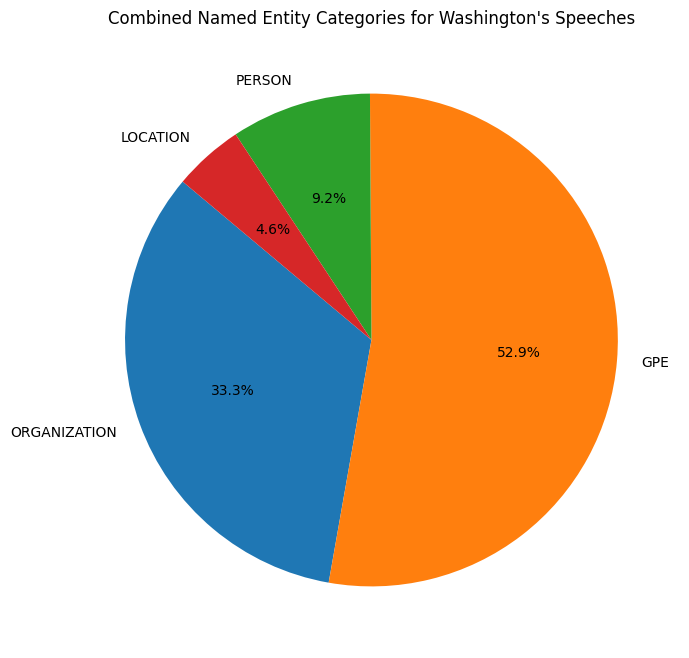

In [22]:
president_name = 'Washington'
if president_name in by_president:
    addresses = by_president[president_name]
    print(f"State of the Union addresses for {president_name}:")
    for address in addresses:
        sentences = sent_tokenize(address)
        token_sentences = [word_tokenize(sent) for sent in sentences]

        # Tag each tokenized sentence into parts of speech: pos_sentences
        pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

        # Create the named entity chunks: chunked_sentences  
        chunked_sentences = ne_chunk_sents(pos_sentences, binary=False)
        ner_categories_combined = defaultdict(int)

        # Create the nested for loop
        for sent in chunked_sentences:
            for chunk in sent:
                if hasattr(chunk, 'label'):
                    ner_categories_combined[chunk.label()] += 1

    # Create a list from the dictionary keys for the chart labels: labels
    labels = list(ner_categories_combined.keys())

    # Create a list of the values: values
    values = [ner_categories_combined.get(l) for l in labels]

    # Create the pie chart
    fig = plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Combined Named Entity Categories for Washington's Speeches")
    plt.show()

State of the Union addresses for Washington:


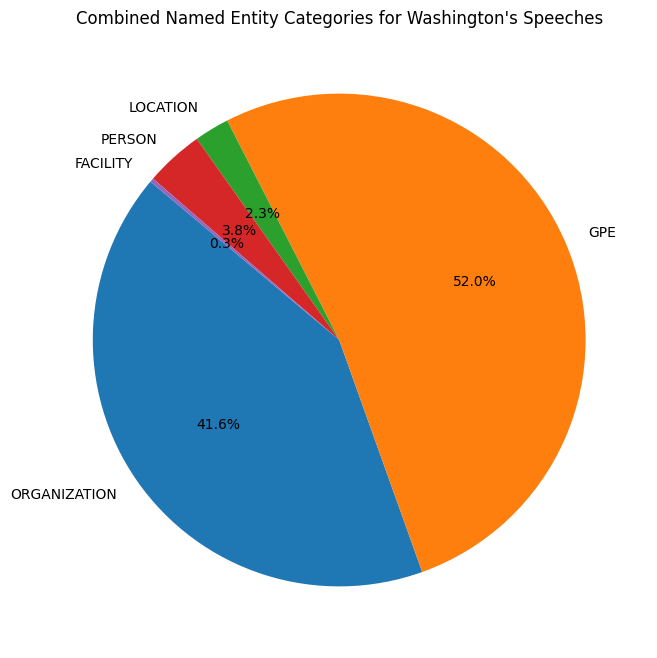

State of the Union addresses for Adams:


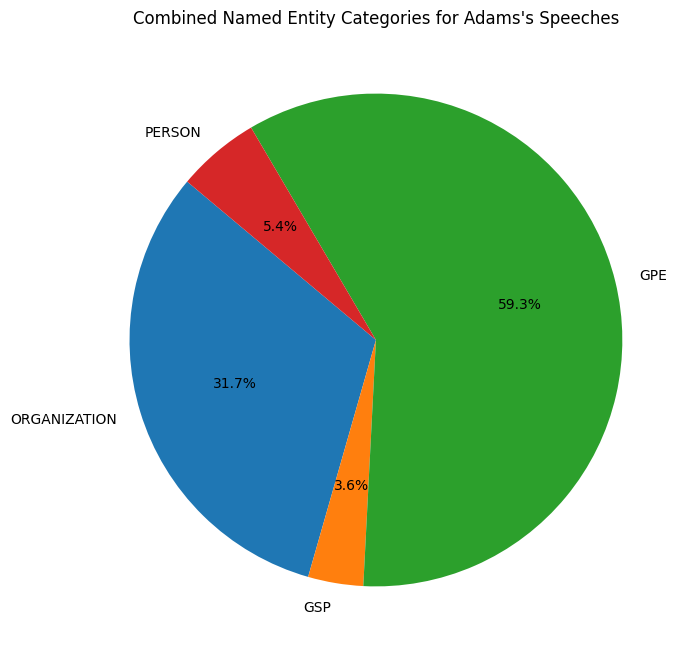

State of the Union addresses for Wilson:


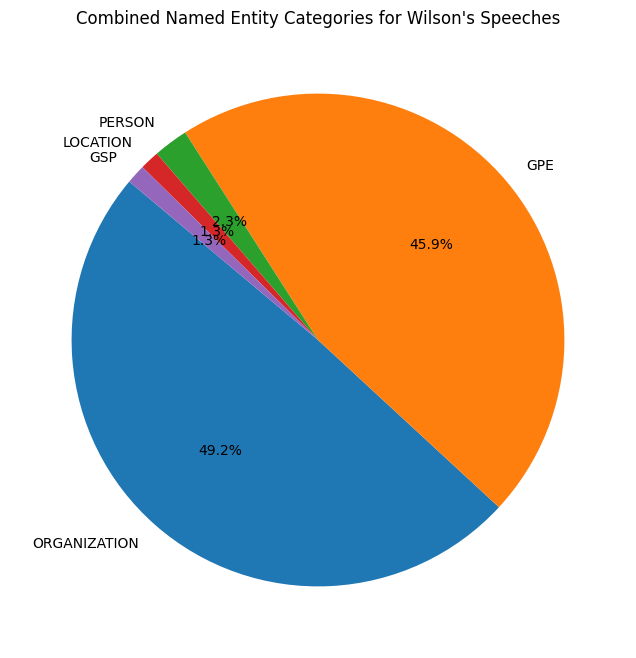

State of the Union addresses for Harding:


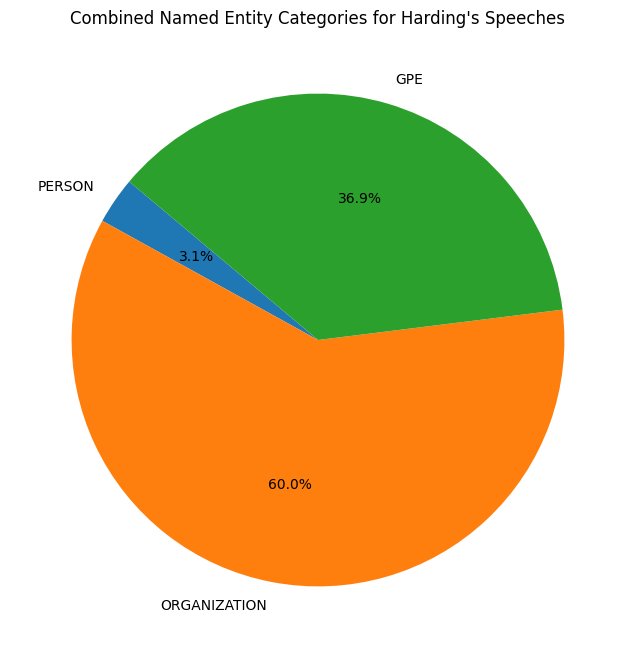

State of the Union addresses for Coolidge:


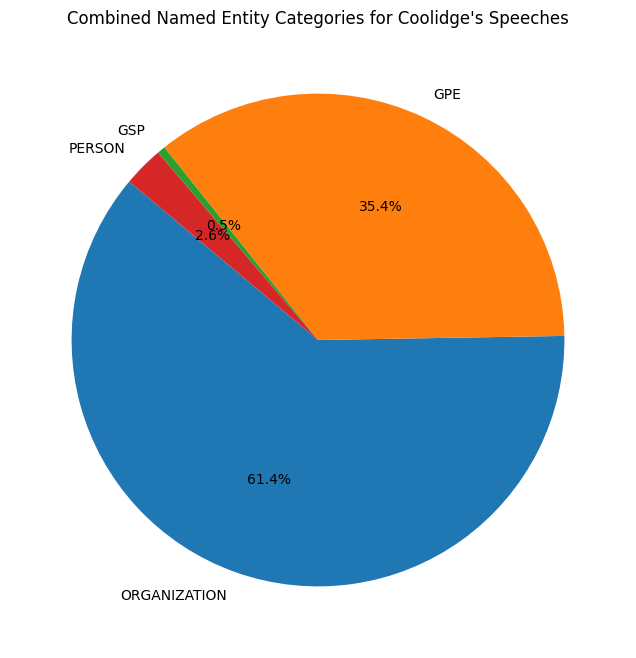

State of the Union addresses for Roosevelt:


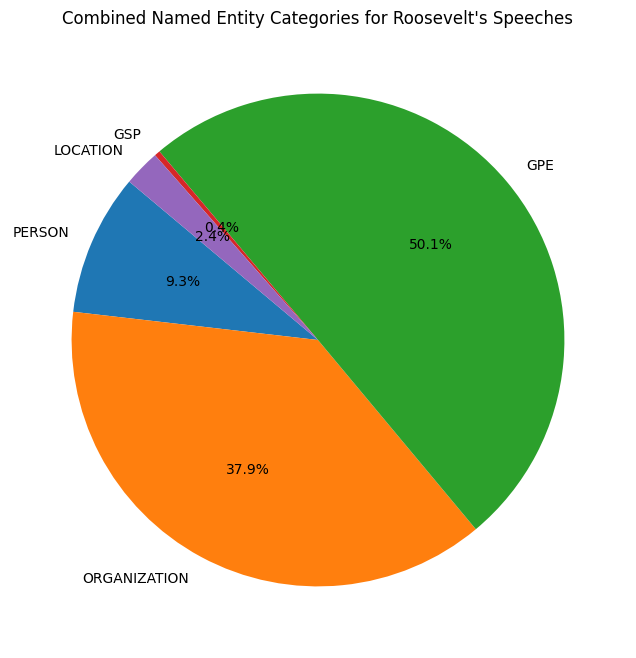

State of the Union addresses for Truman:


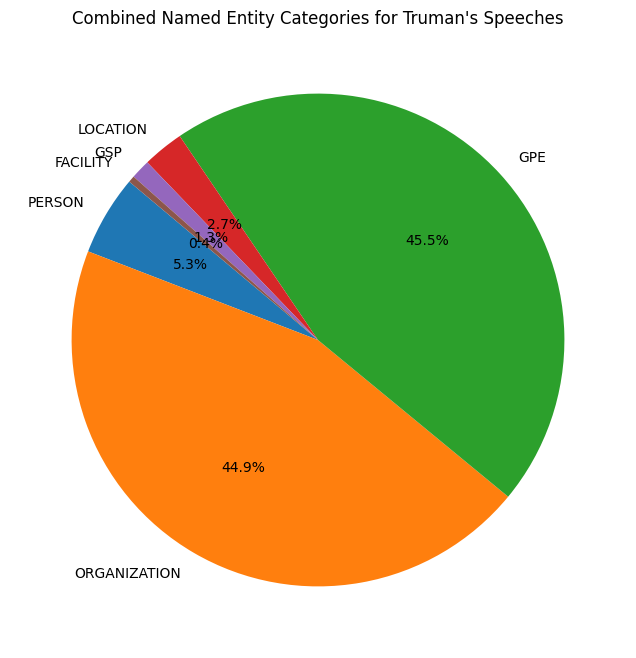

State of the Union addresses for Eisenhower:


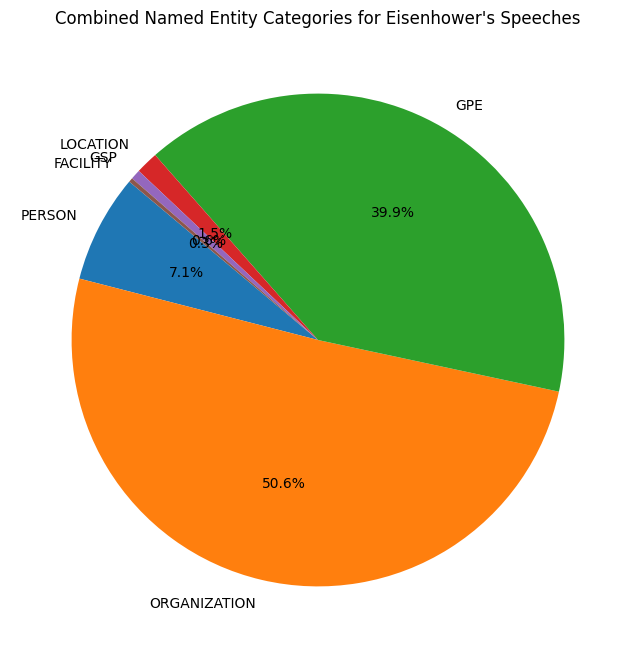

State of the Union addresses for Kennedy:


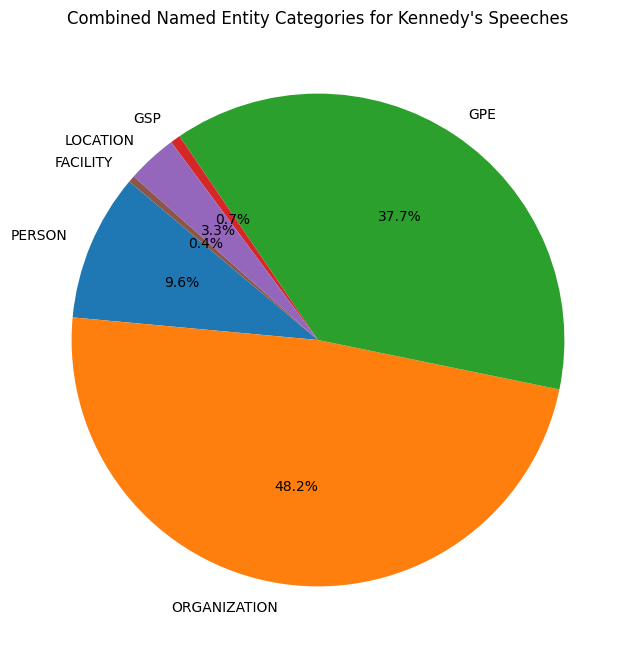

State of the Union addresses for Johnson:


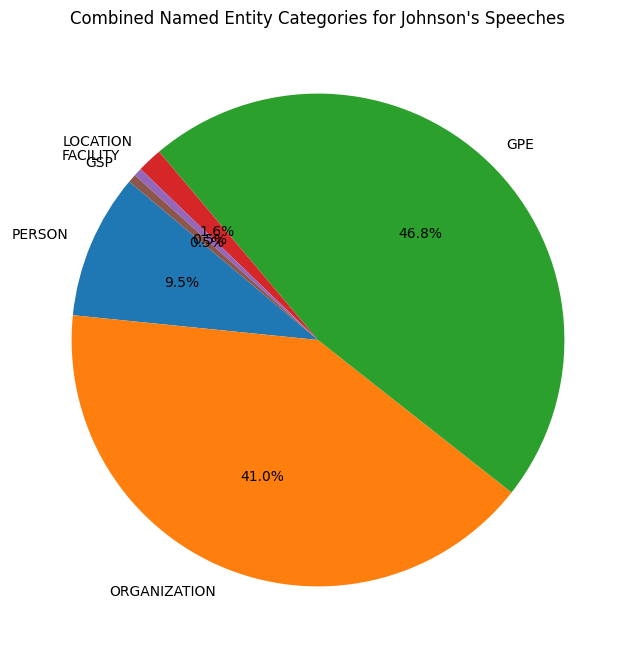

State of the Union addresses for Nixon:


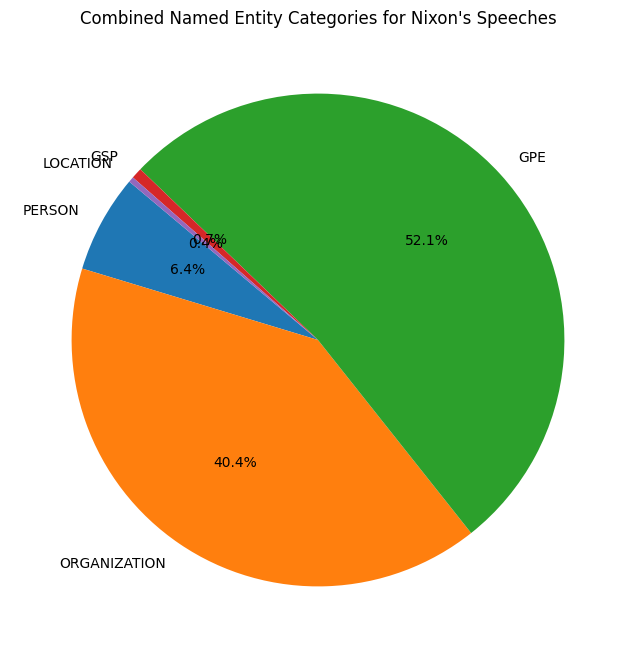

State of the Union addresses for Ford:


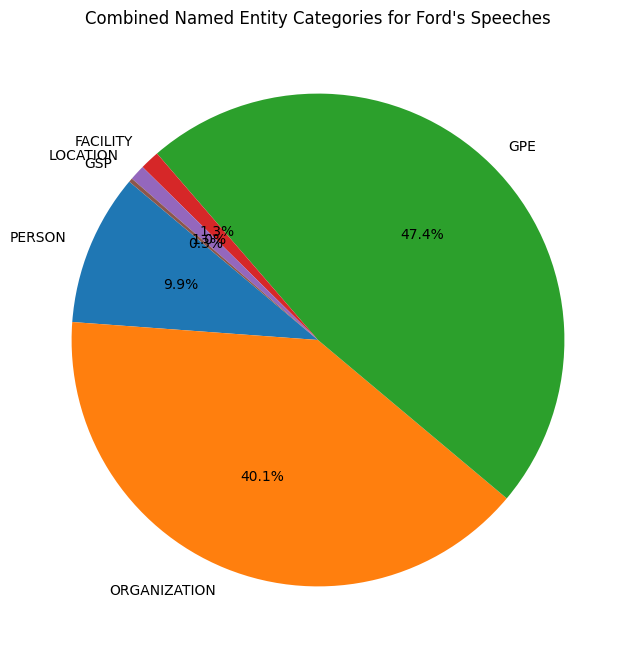

State of the Union addresses for Carter:


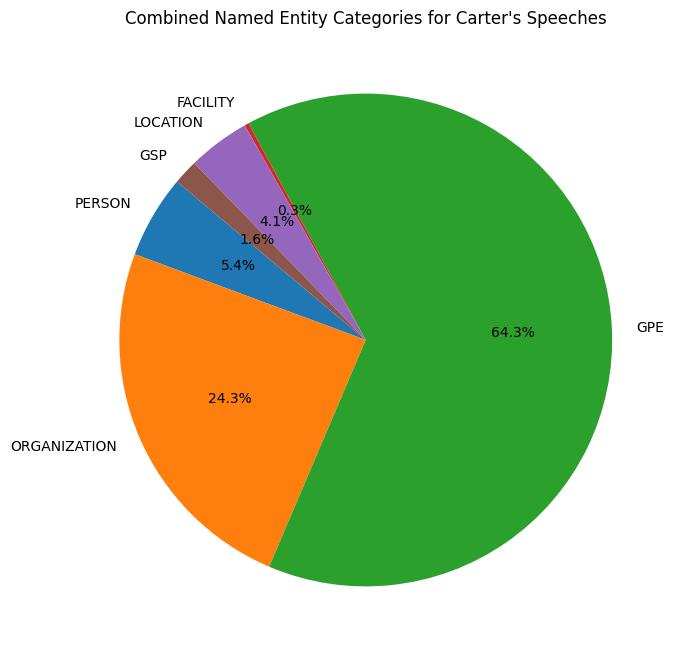

State of the Union addresses for Reagan:


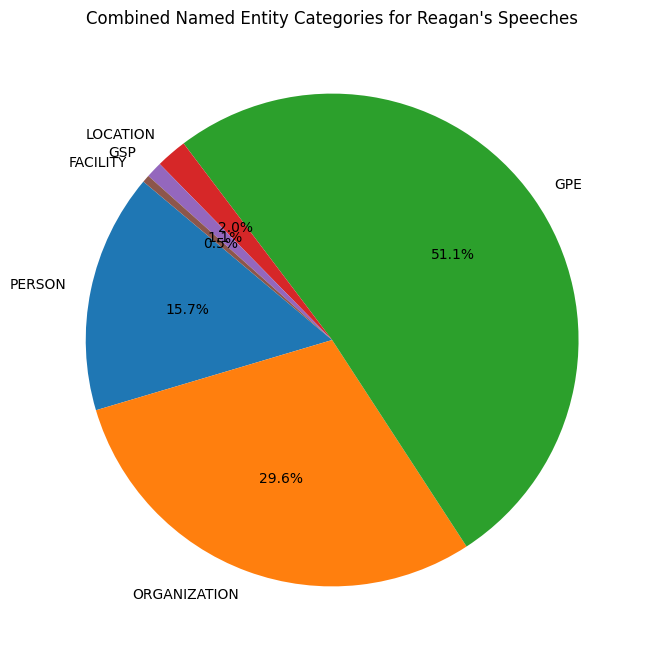

State of the Union addresses for HWBush:


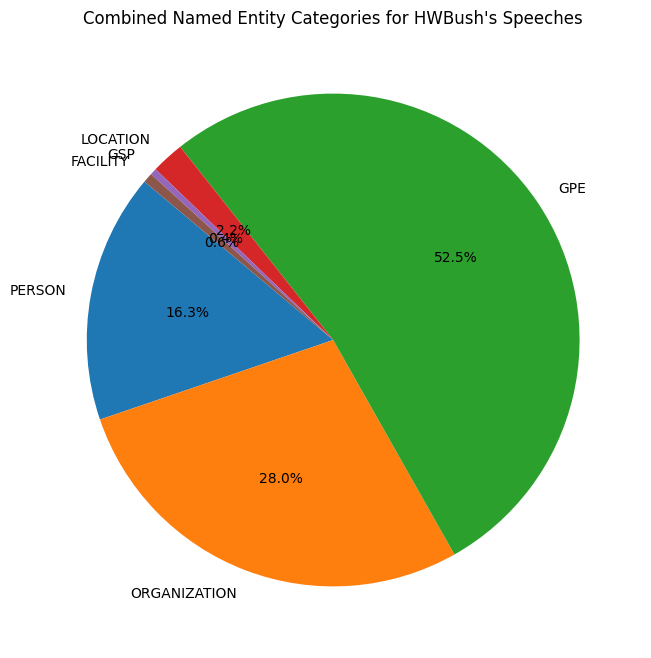

State of the Union addresses for Clinton:


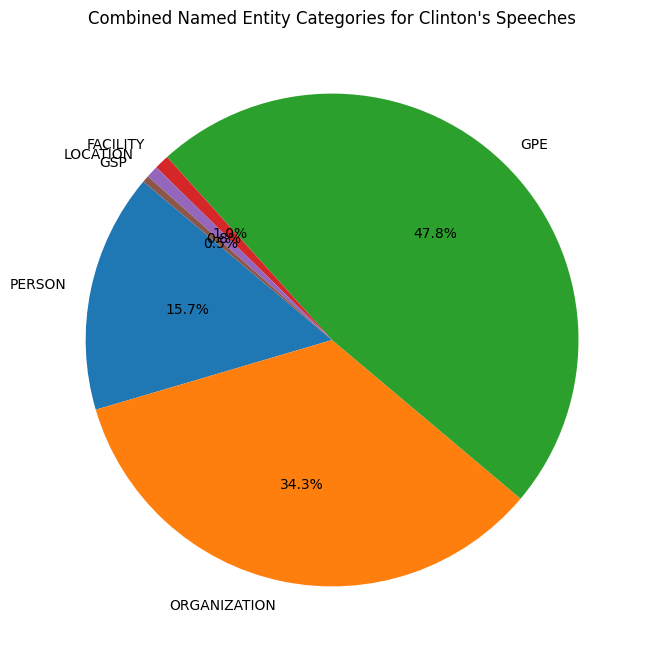

State of the Union addresses for Bush:


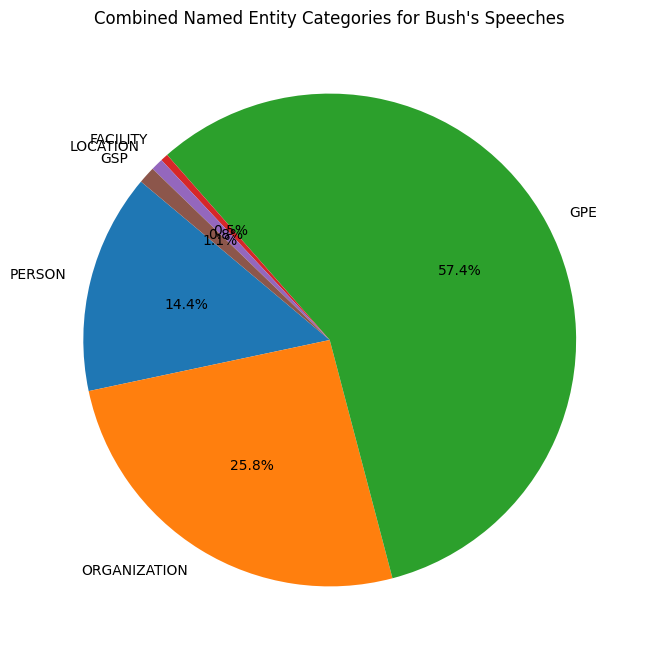

State of the Union addresses for Obama:


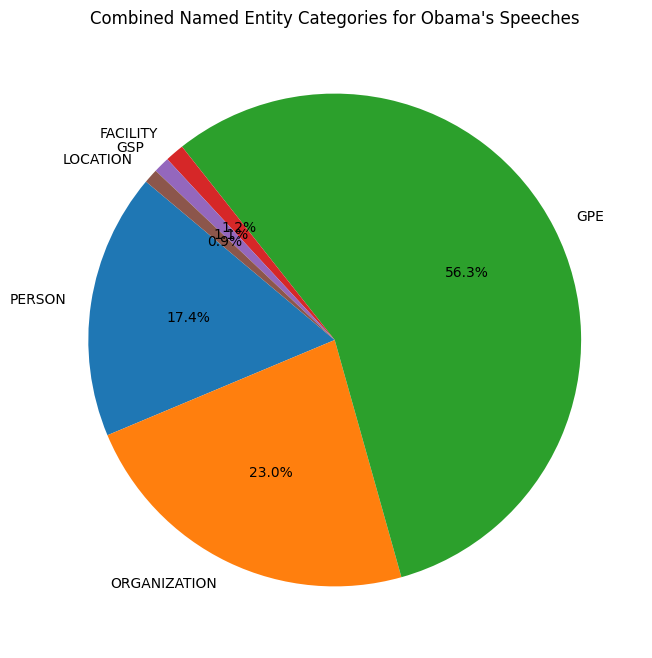

State of the Union addresses for Trump:


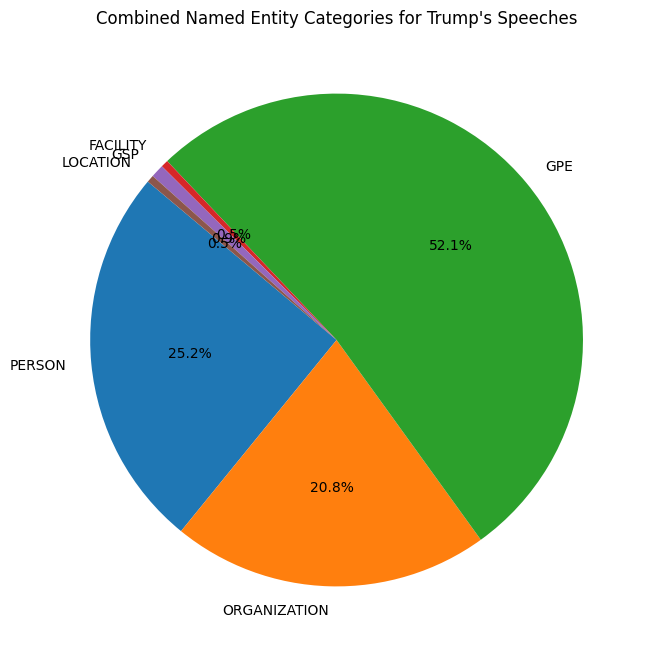

State of the Union addresses for Biden:


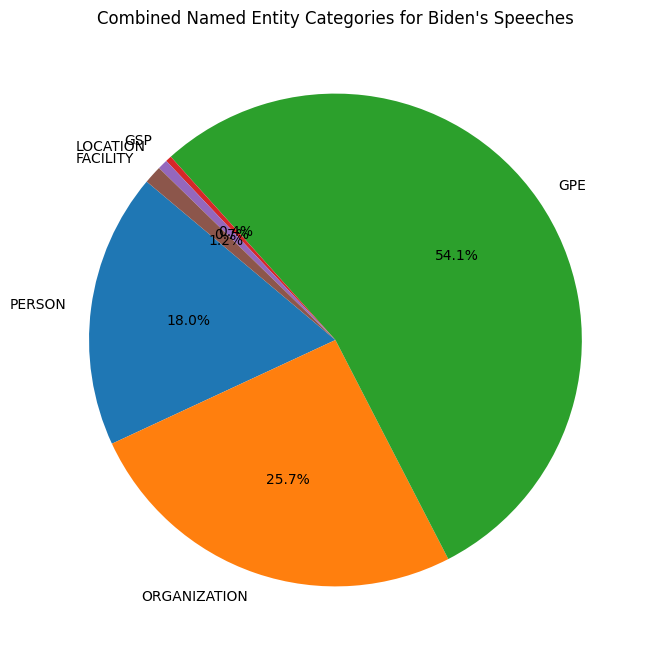

State of the Union addresses for Test:


In [23]:
for president_name, addresses in by_president.items():
    print(f"State of the Union addresses for {president_name}:")
    ner_categories_combined = defaultdict(int)

    for address in addresses:
        sentences = sent_tokenize(address)
        token_sentences = [word_tokenize(sent) for sent in sentences]

        # Tag each tokenized sentence into parts of speech: pos_sentences
        pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

        # Create the named entity chunks: chunked_sentences  
        chunked_sentences = ne_chunk_sents(pos_sentences, binary=False)

        # Create the nested for loop
        for sent in chunked_sentences:
            for chunk in sent:
                if hasattr(chunk, 'label'):
                    ner_categories_combined[chunk.label()] += 1

    if ner_categories_combined:
        # Create a list from the dictionary keys for the chart labels: labels
        labels = list(ner_categories_combined.keys())

        # Create a list of the values: values
        values = [ner_categories_combined.get(l) for l in labels]

        # Create the pie chart
        fig = plt.figure(figsize=(8, 8))
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"Combined Named Entity Categories for {president_name}'s Speeches")
        plt.show()